In [5]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
ttrain_df = pd.read_csv('/Users/chen/Desktop/train.csv')
ttest_df = pd.read_csv('/Users/chen/Desktop/test.csv')
combine = [ttrain_df, ttest_df]

In [7]:
print(ttrain_df.columns.values)

['id' 'pclass' 'survived' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked']


In [8]:
ttrain_df.info()
print('_'*40)
ttest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        900 non-null    int64  
 1   pclass    900 non-null    int64  
 2   survived  900 non-null    int64  
 3   sex       900 non-null    object 
 4   age       711 non-null    float64
 5   sibsp     900 non-null    int64  
 6   parch     900 non-null    int64  
 7   ticket    900 non-null    object 
 8   fare      899 non-null    float64
 9   cabin     192 non-null    object 
 10  embarked  898 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 77.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        409 non-null    int64  
 1   pclass    409 non-null    int64  
 2   sex       409 non-

In [9]:
ttrain_df.head()

,id,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,0,male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
1,1,3,0,male,NaN,0,0,359306,8.0500,NaN,S
2,2,3,0,male,NaN,0,0,368323,6.9500,NaN,Q
3,3,3,0,male,NaN,0,0,315037,8.6625,NaN,S
4,4,1,1,male,49.0,1,0,PC 17485,56.9292,A20,C


In [10]:
ttrain_df.tail()

,id,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
895,895,3,0,male,NaN,0,0,349238,7.8958,NaN,S
896,896,3,0,male,25.0,1,0,349237,17.8000,NaN,S
897,897,2,0,male,16.0,0,0,239865,26.0000,NaN,S
898,898,3,1,female,1.0,1,1,347742,11.1333,NaN,S
899,899,2,1,female,27.0,0,0,34218,10.5000,E101,S


In [11]:
ttrain_df.describe()

,id,pclass,survived,age,sibsp,parch,fare
count,900.000000,900.000000,900.000000,711.000000,900.000000,900.000000,899.000000
mean,449.500000,2.316667,0.396667,29.511604,0.484444,0.361111,33.322844
std,259.951919,0.830957,0.489478,14.215867,1.031637,0.846138,55.350905
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,224.750000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,449.500000,3.000000,0.000000,28.000000,0.000000,0.000000,14.000000
75%,674.250000,3.000000,1.000000,38.750000,1.000000,0.000000,30.000000
max,899.000000,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200


In [12]:
ttrain_df.describe(include=['O'])

,sex,ticket,cabin,embarked
count,900,900,192,898
unique,2,697,146,3
top,male,CA. 2343,G6,S
freq,573,8,4,617


In [13]:
ttrain_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.633803
1,2,0.439153
2,3,0.279116


In [14]:
ttrain_df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.740061
1,male,0.200698


In [15]:
ttrain_df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
3,3,0.545455
1,1,0.523585
0,0,0.365539
2,2,0.354839
4,4,0.142857
5,5,0.000000
6,8,0.000000


In [16]:
ttrain_df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
1,1,0.646018
2,2,0.533333
3,3,0.500000
0,0,0.346209
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,9,0.000000


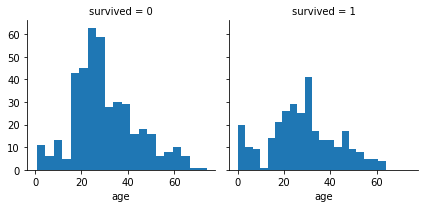

In [17]:
g = sns.FacetGrid(ttrain_df, col='survived')
g.map(plt.hist, 'age', bins=20)

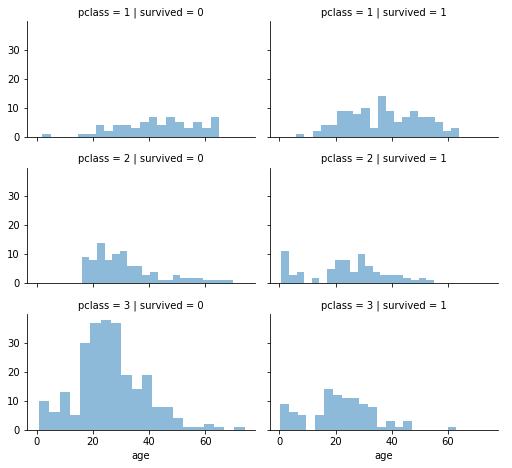

In [19]:
grid = sns.FacetGrid(ttrain_df, col='survived', row='pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

/Users/chen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/chen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


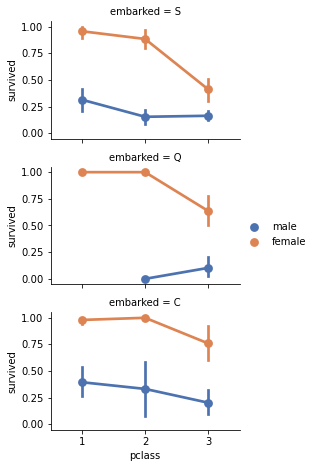

In [20]:
grid = sns.FacetGrid(ttrain_df, row='embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

/Users/chen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


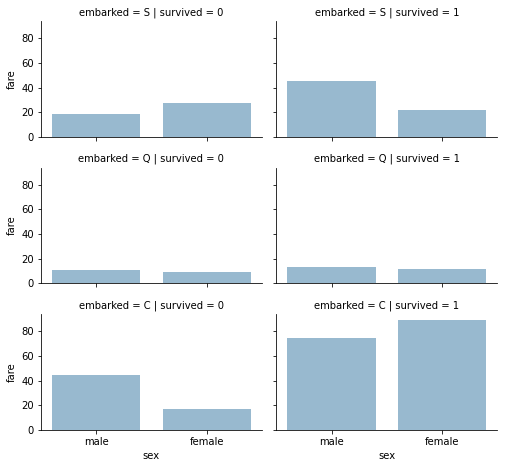

In [21]:
grid = sns.FacetGrid(ttrain_df, row='embarked', col='survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

In [22]:
print("Before", ttrain_df.shape, ttest_df.shape, combine[0].shape, combine[1].shape)

ttrain_df = ttrain_df.drop(['ticket', 'cabin'], axis=1)
ttest_df = ttest_df.drop(['ticket', 'cabin'], axis=1)
combine = [ttrain_df, ttest_df]

"After", ttrain_df.shape, ttest_df.shape, combine[0].shape, combine[1].shape

Before (900, 11) (409, 10) (900, 11) (409, 10)


('After', (900, 9), (409, 8), (900, 9), (409, 8))

In [23]:
ttrain_df = ttrain_df.drop(['id'], axis=1)
ttest_df = ttest_df.drop(['id'], axis=1)
combine = [ttrain_df, ttest_df]
ttrain_df.shape, ttest_df.shape

((900, 8), (409, 7))

In [24]:
for dataset in combine:
    dataset['sex'] = dataset['sex'].map( {'female': 1, 'male': 0} ).astype(int)

ttrain_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,0,24.0,0,0,7.0500,S
1,3,0,0,NaN,0,0,8.0500,S
2,3,0,0,NaN,0,0,6.9500,Q
3,3,0,0,NaN,0,0,8.6625,S
4,1,1,0,49.0,1,0,56.9292,C


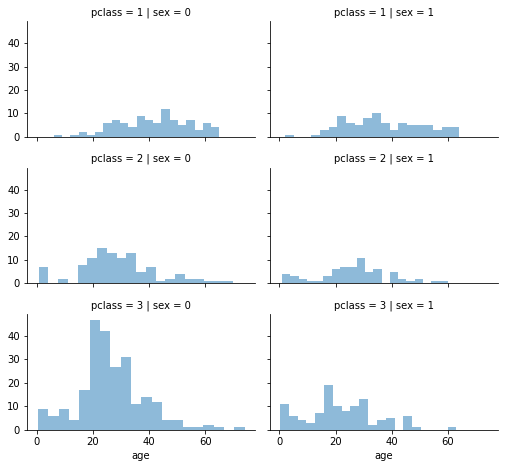

In [25]:
grid = sns.FacetGrid(ttrain_df, row='pclass', col='sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['sex'] == i) & (dataset['pclass'] == j+1)]['age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.age.isnull()) & (dataset.sex == i) & (dataset.pclass == j+1),\
                    'age'] = guess_ages[i,j]

    dataset['age'] = dataset['age'].astype(int)

ttrain_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,0,24,0,0,7.0500,S
1,3,0,0,25,0,0,8.0500,S
2,3,0,0,25,0,0,6.9500,Q
3,3,0,0,25,0,0,8.6625,S
4,1,1,0,49,1,0,56.9292,C


In [28]:
ttrain_df['agegroup'] = pd.cut(ttrain_df['age'], 5)
ttrain_df[['agegroup', 'survived']].groupby(['agegroup'], as_index=False).mean().sort_values(by='agegroup', ascending=True)

,agegroup,survived
0,"(-0.074, 14.8]",0.569620
1,"(14.8, 29.6]",0.346723
2,"(29.6, 44.4]",0.427350
3,"(44.4, 59.2]",0.466667
4,"(59.2, 74.0]",0.250000


In [29]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 14.8, 'age'] = 0
    dataset.loc[(dataset['age'] > 14.8) & (dataset['age'] <= 29.6), 'age'] = 1
    dataset.loc[(dataset['age'] > 29.6) & (dataset['age'] <= 44.4), 'age'] = 2
    dataset.loc[(dataset['age'] > 44.4) & (dataset['age'] <= 59.2), 'age'] = 3
    dataset.loc[ dataset['age'] > 59.2, 'age'] = 4

ttrain_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,agegroup
0,3,0,0,1,0,0,7.0500,S,"(14.8, 29.6]"
1,3,0,0,1,0,0,8.0500,S,"(14.8, 29.6]"
2,3,0,0,1,0,0,6.9500,Q,"(14.8, 29.6]"
3,3,0,0,1,0,0,8.6625,S,"(14.8, 29.6]"
4,1,1,0,3,1,0,56.9292,C,"(44.4, 59.2]"


In [30]:
ttrain_df = ttrain_df.drop(['agegroup'], axis=1)
combine = [ttrain_df, ttest_df]
ttrain_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,0,1,0,0,7.0500,S
1,3,0,0,1,0,0,8.0500,S
2,3,0,0,1,0,0,6.9500,Q
3,3,0,0,1,0,0,8.6625,S
4,1,1,0,3,1,0,56.9292,C


In [31]:
for dataset in combine:
    dataset['familysize'] = dataset['sibsp'] + dataset['parch'] + 1

ttrain_df[['familysize', 'survived']].groupby(['familysize'], as_index=False).mean().sort_values(by='survived', ascending=False)

,familysize,survived
3,4,0.760000
2,3,0.600000
1,2,0.512821
4,5,0.333333
0,1,0.324910
5,6,0.214286
6,7,0.200000
7,8,0.000000
8,11,0.000000


In [32]:
for dataset in combine:
    dataset['alone'] = 0
    dataset.loc[dataset['familysize'] == 1, 'alone'] = 1

ttrain_df[['alone', 'survived']].groupby(['alone'], as_index=False).mean()

,alone,survived
0,0,0.511561
1,1,0.324910


In [33]:
ttrain_df = ttrain_df.drop(['parch', 'sibsp', 'familysize'], axis=1)
ttest_df = ttest_df.drop(['parch', 'sibsp', 'familysize'], axis=1)
combine = [ttrain_df, ttest_df]

ttrain_df.head()

,pclass,survived,sex,age,fare,embarked,alone
0,3,0,0,1,7.0500,S,1
1,3,0,0,1,8.0500,S,1
2,3,0,0,1,6.9500,Q,1
3,3,0,0,1,8.6625,S,1
4,1,1,0,3,56.9292,C,0


In [34]:
freq_port = ttrain_df.embarked.dropna().mode()[0]
freq_port

'S'

In [35]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].fillna(freq_port)
    
ttrain_df[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
0,C,0.569948
1,Q,0.386364
2,S,0.344103


In [36]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)

ttrain_df.head()

,pclass,survived,sex,age,fare,embarked,alone
0,3,0,0,1,7.0500,2,1
1,3,0,0,1,8.0500,2,1
2,3,0,0,1,6.9500,1,1
3,3,0,0,1,8.6625,2,1
4,1,1,0,3,56.9292,0,0


In [37]:
ttrain_df.info()
print('_'*40)
ttest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    900 non-null    int64  
 1   survived  900 non-null    int64  
 2   sex       900 non-null    int64  
 3   age       900 non-null    int64  
 4   fare      899 non-null    float64
 5   embarked  900 non-null    int64  
 6   alone     900 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 49.3 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    409 non-null    int64  
 1   sex       409 non-null    int64  
 2   age       409 non-null    int64  
 3   fare      409 non-null    float64
 4   embarked  409 non-null    int64  
 5   alone     409 non-null    int64  
dtypes: float64(1), int64(5)
memory u

In [38]:
ttrain_df['fare'].fillna(ttrain_df['fare'].dropna().median(), inplace=True)
ttrain_df.head()

,pclass,survived,sex,age,fare,embarked,alone
0,3,0,0,1,7.0500,2,1
1,3,0,0,1,8.0500,2,1
2,3,0,0,1,6.9500,1,1
3,3,0,0,1,8.6625,2,1
4,1,1,0,3,56.9292,0,0


In [39]:
ttrain_df.info()
print('_'*30)
ttest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    900 non-null    int64  
 1   survived  900 non-null    int64  
 2   sex       900 non-null    int64  
 3   age       900 non-null    int64  
 4   fare      900 non-null    float64
 5   embarked  900 non-null    int64  
 6   alone     900 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 49.3 KB
______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    409 non-null    int64  
 1   sex       409 non-null    int64  
 2   age       409 non-null    int64  
 3   fare      409 non-null    float64
 4   embarked  409 non-null    int64  
 5   alone     409 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.3

In [40]:
ttrain_df['fareclass'] = pd.qcut(ttrain_df['fare'], 4)
ttrain_df[['fareclass', 'survived']].groupby(['fareclass'], as_index=False).mean().sort_values(by='fareclass', ascending=True)

,fareclass,survived
0,"(-0.001, 7.896]",0.252101
1,"(7.896, 14.0]",0.295775
2,"(14.0, 30.0]",0.460177
3,"(30.0, 512.329]",0.582960


In [42]:
for dataset in combine:
    dataset.loc[ dataset['fare'] <= 7.896, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.896) & (dataset['fare'] <= 14), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14) & (dataset['fare'] <= 30), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 30, 'fare'] = 3
    dataset['fare'] = dataset['fare'].astype(int)

In [43]:
ttrain_df = ttrain_df.drop(['fareclass'], axis=1)

combine = [ttrain_df, ttest_df]
    
ttrain_df.head()

,pclass,survived,sex,age,fare,embarked,alone
0,3,0,0,1,0,2,1
1,3,0,0,1,0,2,1
2,3,0,0,1,0,1,1
3,3,0,0,1,0,2,1
4,1,1,0,3,0,0,0


In [44]:
ttrain_df.info()
print('_'*40)
ttest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pclass    900 non-null    int64
 1   survived  900 non-null    int64
 2   sex       900 non-null    int64
 3   age       900 non-null    int64
 4   fare      900 non-null    int64
 5   embarked  900 non-null    int64
 6   alone     900 non-null    int64
dtypes: int64(7)
memory usage: 49.3 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pclass    409 non-null    int64
 1   sex       409 non-null    int64
 2   age       409 non-null    int64
 3   fare      409 non-null    int64
 4   embarked  409 non-null    int64
 5   alone     409 non-null    int64
dtypes: int64(6)
memory usage: 19.3 KB


In [45]:
X_ttrain = ttrain_df.drop("survived", axis=1)
Y_ttrain = ttrain_df["survived"]
X_ttest  = ttest_df
X_ttrain.shape, Y_ttrain.shape, X_ttest.shape

((900, 6), (900,), (409, 6))

In [46]:
svc = SVC()
svc.fit(X_ttrain, Y_ttrain)
Y_tpred = svc.predict(X_ttest)
acc_svc = round(svc.score(X_ttrain, Y_ttrain) * 100, 2)
acc_svc

80.0

In [48]:
perceptron = Perceptron()
perceptron.fit(X_ttrain, Y_ttrain)
Y_tpred = perceptron.predict(X_ttest)
acc_perceptron = round(perceptron.score(X_ttrain, Y_ttrain) * 100, 2)
acc_perceptron

65.22

In [49]:
sgd = SGDClassifier()
sgd.fit(X_ttrain, Y_ttrain)
Y_tpred = sgd.predict(X_ttest)
acc_sgd = round(sgd.score(X_ttrain, Y_ttrain) * 100, 2)
acc_sgd

78.11

In [50]:
coeff_df = pd.DataFrame(ttrain_df.columns.delete(1))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(sgd.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,sex,3.411587
5,alone,0.426448
3,fare,0.000000
4,embarked,-0.426448
2,age,-0.852897
0,pclass,-1.705793


In [51]:
coeff_df = pd.DataFrame(ttrain_df.columns.delete(1))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(perceptron.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,sex,10.0
5,alone,1.0
3,fare,0.0
4,embarked,-1.0
2,age,-5.0
0,pclass,-8.0


In [52]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Perceptron', 'Stochastic Gradient Decent'],
    'Score': [acc_svc, acc_perceptron, acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,80.00
2,Stochastic Gradient Decent,78.11
1,Perceptron,65.22


In [54]:
ttest_df = pd.read_csv('/Users/chen/Desktop/test.csv')
Y_tpred = svc.predict(X_ttest)
Y_ttest = pd.DataFrame({
        "id": ttest_df["id"],
        "survived": Y_tpred
    })
Y_ttest.head()

,id,survived
0,900,0
1,901,1
2,902,1
3,903,1
4,904,0


In [55]:
Y_ttest.to_csv('/Users/chen/Desktop/Pred_Chen.csv', index=False)